# Enunciado

<img src="images/enunciado.png" style="width: 850px;"/>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from EDOnum import *
from utils import *

plt.style.use(['science','no-latex'])

# Definições

In [2]:
# constants
t0 = 0
y0 = np.array([1,0])
tf = 2*np.pi
T = 5
h = 0.1
n = int((tf-t0)/h)

# EDO
def y_dot(t:float,y:np.array) -> np.array:
    return np.array([-np.sin(t),(4*y[0]**2) - 2])

# True Solution
def y_true(t:float) -> np.array:
    return np.array([np.cos(t),np.sin(2*t)])


# Soluções

In [3]:
# EDO
edo_tarefa2 = EDONumSol(y_dot = y_dot,
                        y_0 = y0,
                        t_0 = t0,
                        t_f = tf,
                        h = h)

# Exact Solution
t_e = np.linspace(t0,tf,100)
y_exact = np.array([y_true(t_) for t_ in t_e]).swapaxes(0,1)

## Método de Euler

In [4]:
hs = [0.1, 0.01, 0.001]

sol_euler = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "euler-explicit")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_euler.append(sol)

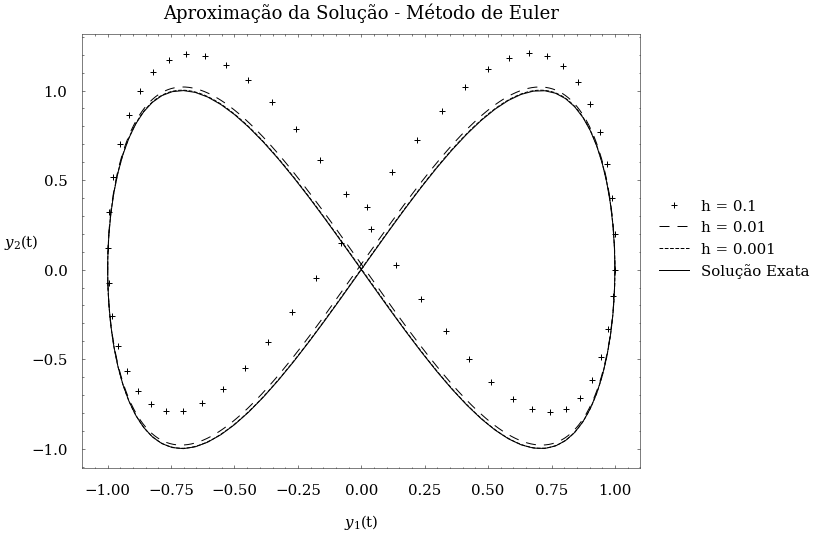

In [5]:
plot_solution(sol_euler,y_exact,"Aproximação da Solução - Método de Euler")
plt.savefig(f'images/euler_1.png', dpi=300)

## Método de Euler Implicito

In [6]:
hs = [0.1, 0.01, 0.001]

sol_euler_imp = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "euler-implicit")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_euler_imp.append(sol)

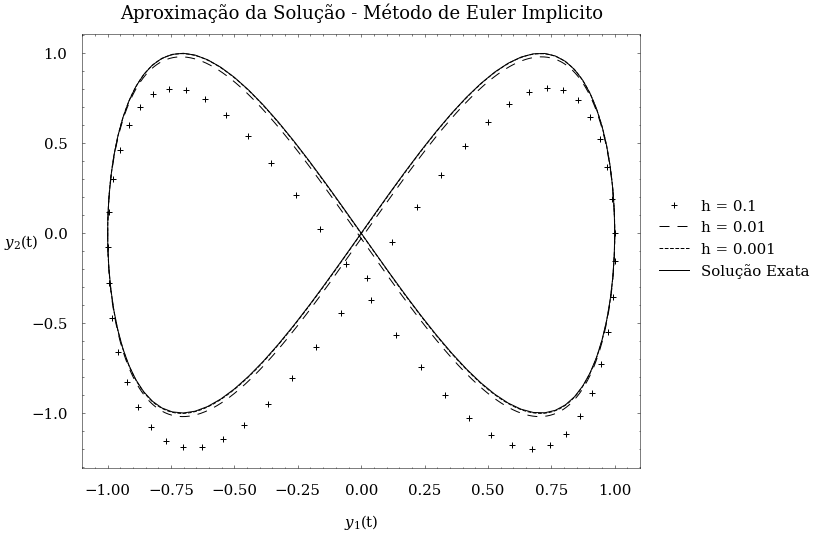

In [7]:
plot_solution(sol_euler_imp,y_exact,"Aproximação da Solução - Método de Euler Implicito")
plt.savefig(f'images/euler_imp_1.png', dpi=300)

## Método de Runge-Kutta

In [8]:
hs = [0.1, 0.01, 0.001]

sol_rk = []
t = []
for h_ in hs:
    t_,sol = edo_tarefa2.solve(h=h_,method = "runge-kutta")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_rk.append(sol)

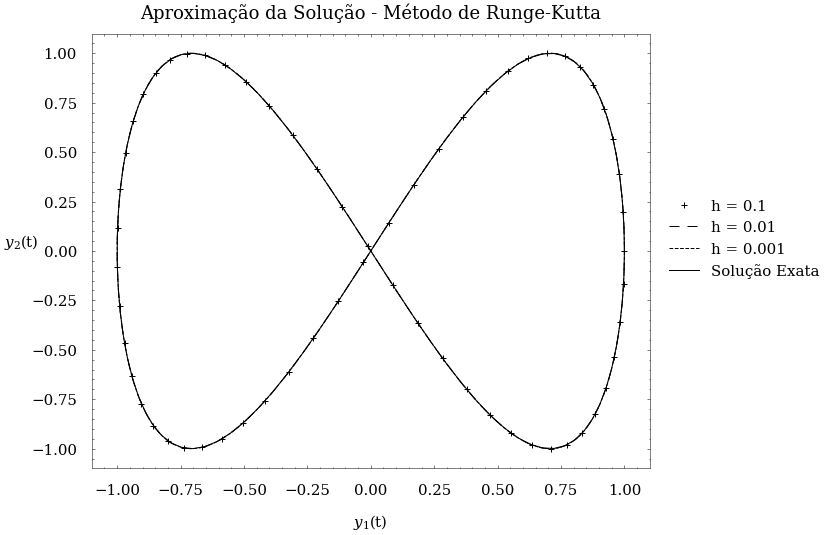

In [9]:
plot_solution(sol_rk,y_exact,"Aproximação da Solução - Método de Runge-Kutta")
plt.savefig(f'images/runge-kutta_1.png', dpi=300)

## Comparação entre Métodos

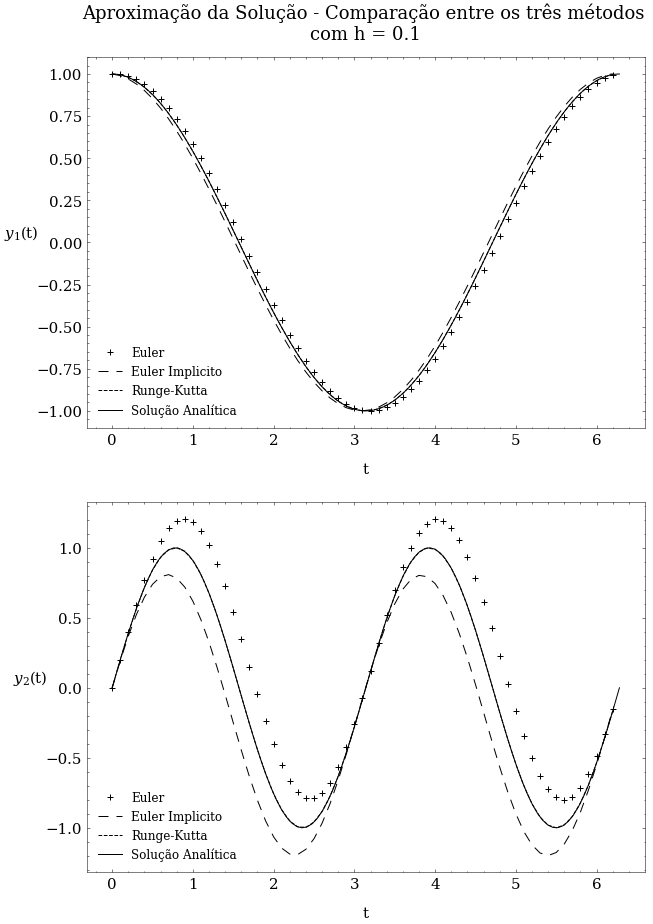

In [10]:
fig,ax = plt.subplots(2,1,figsize=(10,15))

ax[0].plot(t[0],sol_euler[0][0],'k+', label="Euler") #,'k--',dashes=[10,8]
ax[0].plot(t[0],sol_euler_imp[0][0],'k--',dashes=[10,8], label="Euler Implicito") #,'k--',dashes=[10,8]
ax[0].plot(t[0],sol_rk[0][0],'k--', label="Runge-Kutta") #,'k--',dashes=[10,8]
ax[0].plot(t_e,y_exact[0],'k-', label="Solução Analítica")
ax[0].set_title("Aproximação da Solução - Comparação entre os três métodos \ncom h = 0.1",fontsize=18, pad = 18)
ax[0].set_xlabel('t', fontsize=15, labelpad = 15)
ax[0].set_ylabel('$y_1$(t)', fontsize=15, rotation = 0, labelpad = 15)

ax[1].plot(t[0],sol_euler[0][1],'k+', label="Euler") #,'k--',dashes=[10,8]
ax[1].plot(t[0],sol_euler_imp[0][1],'k--',dashes=[10,8], label="Euler Implicito") #,'k--',dashes=[10,8]
ax[1].plot(t[0],sol_rk[0][1],'k--', label="Runge-Kutta") #,'k--',dashes=[10,8]
ax[1].plot(t_e,y_exact[1],'k-', label="Solução Analítica")
ax[1].set_xlabel('t', fontsize=15, labelpad = 15)
ax[1].set_ylabel('$y_2$(t)', fontsize=15, rotation = 0, labelpad = 15)

for i in range(2):
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].legend(fontsize=12, loc = "lower left")
    ax[i].tick_params(axis='both', which='major', labelsize=15, pad=5)
    
plt.savefig(f'images/comparacao_1.png', dpi=300)

# Análise de Convergência

In [65]:
edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")

,k,h_k,y_var0,y_var1,e_tilde_var0,e_tilde_var1,p_tilde_var0,p_tilde_var1,error_var0,error_var1,p_var0,p_var1
0,0,1.000000,-0.135086,3.536998,NaN,NaN,NaN,NaN,0.418748,4.081020,NaN,NaN
1,1,0.500000,0.058917,1.469561,NaN,NaN,NaN,NaN,0.224745,2.013582,0.897795,1.019165
2,2,0.250000,0.167531,0.431916,0.440773,4.150641,0.836870,0.994530,0.116131,0.975937,0.952538,1.044905
3,3,0.125000,0.224662,-0.068327,0.229143,2.003542,0.926868,1.052612,0.059000,0.475694,0.976968,1.036755
4,4,0.062500,0.253929,-0.309913,0.117137,0.967469,0.965016,1.050095,0.029733,0.234108,0.988636,1.022858
5,5,0.031250,0.268737,-0.427992,0.059242,0.472554,0.982850,1.032783,0.014925,0.116029,0.994353,1.012686
6,6,0.015625,0.276185,-0.486274,0.029793,0.233168,0.991505,1.018616,0.007477,0.057747,0.997185,1.006677
7,7,0.007812,0.279920,-0.515216,0.014940,0.115773,0.995771,1.009906,0.003742,0.028805,0.998595,1.003424
8,8,0.003906,0.281790,-0.529636,0.007481,0.057680,0.997890,1.005109,0.001872,0.014385,0.999298,1.001734
9,9,0.001953,0.282726,-0.536833,0.003743,0.028788,0.998946,1.002594,0.000936,0.007188,0.999649,1.000872


In [66]:
conv_res = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")

Index(['k', 'h_k', 'y_var0', 'y_var1', 'e_tilde_var0', 'e_tilde_var1',
       'p_tilde_var0', 'p_tilde_var1', 'error_var0', 'error_var1', 'p_var0',
       'p_var1'],
      dtype='object')

In [75]:
for index, row in conv_res.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.4e}$ & ${error_var1:.4e}$ & ${e_tilde_var0:.4e}$ & ${e_tilde_var1:.4e}$\\\\\n"
    print(r_table.replace("nan","-"))


$1$ & $4.1875e-01$ & $4.0810e+00$ & $-$ & $-$\\

$2$ & $2.2474e-01$ & $2.0136e+00$ & $-$ & $-$\\

$4$ & $1.1613e-01$ & $9.7594e-01$ & $4.4077e-01$ & $4.1506e+00$\\

$8$ & $5.9000e-02$ & $4.7569e-01$ & $2.2914e-01$ & $2.0035e+00$\\

$16$ & $2.9733e-02$ & $2.3411e-01$ & $1.1714e-01$ & $9.6747e-01$\\

$32$ & $1.4925e-02$ & $1.1603e-01$ & $5.9242e-02$ & $4.7255e-01$\\

$64$ & $7.4770e-03$ & $5.7747e-02$ & $2.9793e-02$ & $2.3317e-01$\\

$128$ & $3.7422e-03$ & $2.8805e-02$ & $1.4940e-02$ & $1.1577e-01$\\

$256$ & $1.8720e-03$ & $1.4385e-02$ & $7.4807e-03$ & $5.7680e-02$\\

$512$ & $9.3622e-04$ & $7.1882e-03$ & $3.7431e-03$ & $2.8788e-02$\\



In [74]:
for index, row in conv_res.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${p_var0:.5f}$ & ${p_var1:.5f}$ & ${p_tilde_var0:.5f}$ & ${p_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))


$1$ & $-$ & $-$ & $-$ & $-$\\

$2$ & $0.89779$ & $1.01917$ & $-$ & $-$\\

$4$ & $0.95254$ & $1.04490$ & $0.83687$ & $0.99453$\\

$8$ & $0.97697$ & $1.03675$ & $0.92687$ & $1.05261$\\

$16$ & $0.98864$ & $1.02286$ & $0.96502$ & $1.05009$\\

$32$ & $0.99435$ & $1.01269$ & $0.98285$ & $1.03278$\\

$64$ & $0.99719$ & $1.00668$ & $0.99150$ & $1.01862$\\

$128$ & $0.99859$ & $1.00342$ & $0.99577$ & $1.00991$\\

$256$ & $0.99930$ & $1.00173$ & $0.99789$ & $1.00511$\\

$512$ & $0.99965$ & $1.00087$ & $0.99895$ & $1.00259$\\



In [12]:
edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")

,k,h_k,y_var0,y_var1,e_tilde_var0,e_tilde_var1,p_tilde_var0,p_tilde_var1,error_var0,error_var1,p_var0,p_var1
0,0,1.000000,0.823838,-1.675170,NaN,NaN,NaN,NaN,0.540176,1.131149,NaN,NaN
1,1,0.500000,0.538380,-1.943791,NaN,NaN,NaN,NaN,0.254717,1.399770,1.084533,-0.307401
2,2,0.250000,0.407263,-1.374155,0.527963,-0.239713,1.122428,-1.084469,0.123600,0.830134,1.043214,0.753775
3,3,0.125000,0.344528,-0.983741,0.251405,1.810515,1.063521,0.545039,0.060866,0.439720,1.021981,0.916759
4,4,0.062500,0.313862,-0.769166,0.122726,0.866835,1.032614,0.863520,0.030200,0.225144,1.011102,0.965733
5,5,0.031250,0.298704,-0.657811,0.060640,0.446058,1.016559,0.946327,0.015041,0.113790,1.005581,0.984474
6,6,0.015625,0.291168,-0.601208,0.030142,0.226475,1.008348,0.976204,0.007506,0.057187,1.002798,0.992614
7,7,0.007812,0.287412,-0.572686,0.015027,0.114095,1.004192,0.988801,0.003749,0.028665,1.001401,0.996398
8,8,0.003906,0.285536,-0.558371,0.007503,0.057260,1.002100,0.994568,0.001874,0.014350,1.000701,0.998222
9,9,0.001953,0.284599,-0.551201,0.003749,0.028683,1.001051,0.997325,0.000937,0.007179,1.000351,0.999116


In [76]:
conv_res_rk = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")

In [77]:
for index, row in conv_res_rk.iterrows():
    k, h_k, y_var0, y_var1, e_tilde_var0, e_tilde_var1,p_tilde_var0, p_tilde_var1, error_var0, error_var1, p_var0,p_var1 = row
    r_table = f"${2**k:.0f}$ & ${p_var0:.5f}$ & ${p_var1:.5f}$ & ${p_tilde_var0:.5f}$ & ${p_tilde_var1:.5f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $-$ & $-$ & $-$ & $-$\\

$2$ & $4.03267$ & $4.05750$ & $-$ & $-$\\

$4$ & $4.00808$ & $4.02832$ & $4.03428$ & $4.05938$\\

$8$ & $4.00201$ & $4.01480$ & $4.00848$ & $4.02920$\\

$16$ & $4.00050$ & $4.00764$ & $4.00212$ & $4.01527$\\

$32$ & $4.00013$ & $4.00389$ & $4.00053$ & $4.00789$\\

$64$ & $3.99999$ & $4.00196$ & $4.00014$ & $4.00402$\\

$128$ & $4.00022$ & $4.00099$ & $3.99997$ & $4.00203$\\

$256$ & $3.98367$ & $4.00060$ & $4.00133$ & $4.00102$\\

$512$ & $5.72110$ & $4.01734$ & $3.91708$ & $3.99949$\\



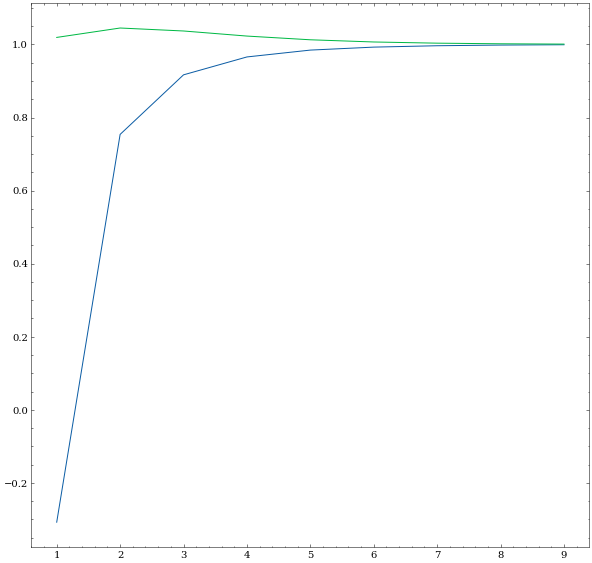

In [26]:
ttt = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")
yyy = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")
zzz = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")
fig,ax = plt.subplots(figsize=(10,10))
#ax.plot(ttt.p_var1)
ax.plot(yyy.p_var1)
ax.plot(zzz.p_var1)

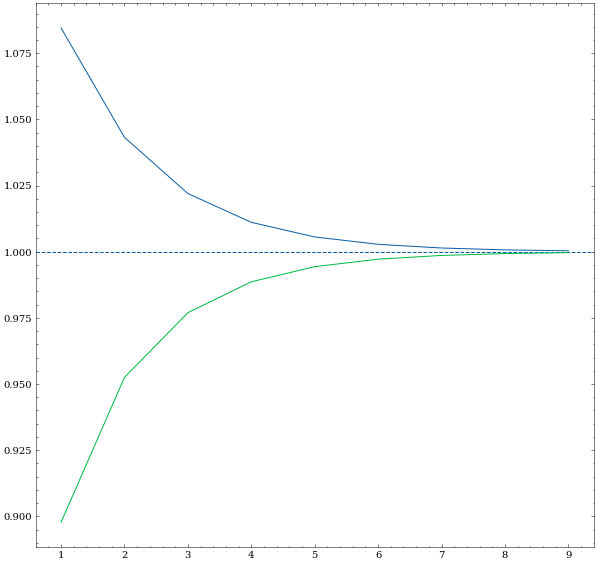

In [39]:
ttt = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")
yyy = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")
zzz = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")
fig,ax = plt.subplots(figsize=(10,10))
#ax.plot(ttt.p_var1)
ax.axhline(y=1, xmin=0, xmax=1,ls="--")
ax.plot(yyy.p_var0)
ax.plot(zzz.p_var0)

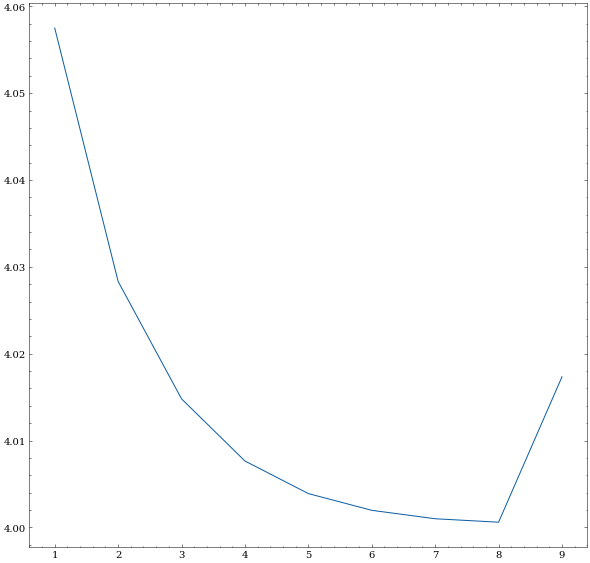

In [33]:
ttt = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "runge-kutta")
yyy = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-implicit")
zzz = edo_tarefa2.convergence_analysis(t_eval = T, h_0 = 1, max_evals=10, y_true = y_true, method= "euler-explicit")
fig,ax = plt.subplots(figsize=(10,10))
#ax.plot(ttt.p_var1)

#ax.plot(ttt.p_var0)
ax.plot(ttt.p_var1)